# Collect Data From YELP

In [8]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd
import warnings
import time 
warnings.filterwarnings("ignore")
num = 0
Restaurants = []
Review = []
CustomerReviews = []


while True:
    url = ("https://www.yelp.com/search?find_desc=Restaurants&find_loc=Los+Angeles%2C+CA%2C+United+States&start="+str(num))
    try:
        html = requests.get(url, verify = False).text
        soup = BeautifulSoup(html, "lxml")
        tokyo = soup.find("main", id = "main-content")
        restaurants = tokyo.find_all("a", attrs = {"target":"_blank", "rel" : "noopener", "name": re.compile("..")})
        
        #get name, average review and number of reviews for each restaurant
        for k in range(len(restaurants)):
            url1 = "https://www.yelp.com" + str(restaurants[k].get("href"))
            html1 = requests.get(url1, verify = False).text
            soup1 = BeautifulSoup(html1, "lxml")
            page = soup1.find_all("li", class_ = "margin-b5__09f24__pTvws border-color--default__09f24__NPAKY")
            
            if(page != None):
                #get comments from each restaurant
                #for the sake of simplicity, we will only extract the first page of the comments
                for j in range(len(page)):
                    if(page[j].find("span", lang = "en") != None):
                        CustomerReviews.append(page[j].find("span", lang = "en").text)
                        Restaurants.append(restaurants[k].text)
                        Review.append(page[j].find("div", attrs = {"role" : "img"})["aria-label"][0])
                
            time.sleep(10)
       
        num += 10
        time.sleep(20)
    except AttributeError:
        break 
        
        
data1={'Restaurants':Restaurants,'Review':Review, "Customer Reviews": CustomerReviews}

df=pd.DataFrame(data1)
 

In [9]:
df

,Restaurants,Review,Customer Reviews
0,Running Goose,5,love love love this place!!!!!!!my favorite di...
1,Running Goose,5,An unassuming entrance that leads to a true Ga...
2,Running Goose,5,"The Pantages Theater is just 3 blocks away, so..."
3,Running Goose,1,I prefer to leave only good reviews and not wa...
4,Running Goose,4,Pretty good spot that you can easily miss. We...
...,...,...,...
2330,Father’s Office,1,Had the shrimp and grits ( no grits ) no good ...
2331,Father’s Office,5,So fun! Great food options and lots of drink o...
2332,Father’s Office,2,We came with our dog and they don't allow dogs...
2333,Father’s Office,5,TL; DR - the burger still slaps. The location...


In [12]:
#get length of comments
Length = [len(df1["Customer Reviews"].loc[i]) for i in range(len(df1))]

#classify reviews as positive or negative
# review >= 4 will be pos // else neg
df1["Sentiment"] = (df1["Review"] >= 4)
df1["Sentiment"] = df1["Sentiment"].replace([True, False], ["pos", "neg"])

In [13]:
df1.head(10)

,Unnamed: 0,Restaurants,Review,Customer Reviews,l,Sentiment
0,0,Running Goose,5,love love love this place!!!!!!!my favorite di...,119,pos
1,1,Running Goose,5,An unassuming entrance that leads to a true Ga...,1000,pos
2,2,Running Goose,5,"The Pantages Theater is just 3 blocks away, so...",400,pos
3,3,Running Goose,1,I prefer to leave only good reviews and not wa...,3755,neg
4,4,Running Goose,4,Pretty good spot that you can easily miss. We...,390,pos
5,5,Running Goose,5,Despite being very close to Hollywood Blvd whe...,1219,pos
6,6,Running Goose,5,A HIDDEN GEM! We literally came here twice in ...,450,pos
7,7,Running Goose,5,This place does NOT play! I've been here three...,471,pos
8,8,Running Goose,5,Simply delicious. There's a clear attention to...,594,pos
9,9,Running Goose,2,Tip creep at its worse.As I masticated a decen...,793,neg


In [11]:
data1 = {"l": Length}
length = pd.DataFrame(data1)

In [12]:
df1 = pd.concat([df,length], axis = 1)

In [27]:
df1

,Unnamed: 0,Restaurants,Review,Customer Reviews,l,Sentiment
0,0,Running Goose,5,love love love this place!!!!!!!my favorite di...,119,pos
1,1,Running Goose,5,An unassuming entrance that leads to a true Ga...,1000,pos
2,2,Running Goose,5,"The Pantages Theater is just 3 blocks away, so...",400,pos
3,3,Running Goose,1,I prefer to leave only good reviews and not wa...,3755,neg
4,4,Running Goose,4,Pretty good spot that you can easily miss. We...,390,pos
...,...,...,...,...,...,...
2330,2330,Father’s Office,1,Had the shrimp and grits ( no grits ) no good ...,525,neg
2331,2331,Father’s Office,5,So fun! Great food options and lots of drink o...,130,pos
2332,2332,Father’s Office,2,We came with our dog and they don't allow dogs...,576,neg
2333,2333,Father’s Office,5,TL; DR - the burger still slaps. The location...,971,pos


In [14]:
from pathlib import Path  
filepath = Path('yelp1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df1.to_csv(filepath)

In [46]:
df["Review"].value_counts(sort = False)

1      91
2      82
5    1393
3     210
4     572
Name: Review, dtype: int64

In [98]:
df.loc[144]["Customer Reviews"]

"I was craving beef intestine bbq and I literally just Yelp searched it and found this place! King Chang is a KBBQ restaurant focused on beef intestines and quality meat! If you haven't tried intestines before, highly recommend you trying it here! Also definitely pair the beef brisket with melted cheese! Game changing combination! I also have to say that the service was excellent, everything came out fast and staff was super attentive and sweet! Thank you for a great experience! What I ordered: -Small beef combo (brisket, boneless short ribs, marinated boneless short ribs, spicy soybean paste stew)-Large Intestine (seriously so delicious and fatty!!! Get this!) -Buckwheat noodles in chilled beef broth (highly recommend, super refreshing and pairs perfectly with all the fatty meats!) -Tteokbokki / spicy rice cakes (The flavor was good but my only complaint is that they didn't give you very many rice cakes! Please give more rice cakes in the future!)"

# EXPLORATORY DATA ANALYSIS 

[Text(0.5, 0, 'Review Label'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency of Yelp Review Labels')]

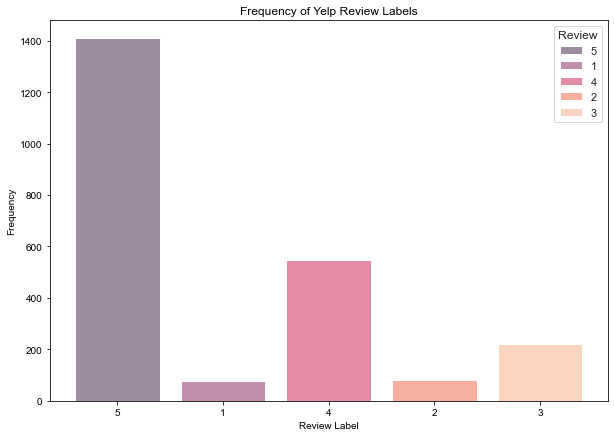

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

fig1, ax = plt.subplots(1, figsize = (10,7))
sns.set_theme(style="white")
sns.histplot(df, x="Review", discrete = True, hue = "Review", palette= "rocket", shrink = 0.8, ax = ax)
ax.set(xlabel = "Review Label", ylabel = "Frequency", title = "Frequency of Yelp Review Labels")
#sns.barplot(x = "Review", data = df)

In [219]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#stopwords = stopwords.words('english')
def preprocessing(text):
    """
    Preprocess text by tokenizing, removing punctuations, lemmatizing text
    Stopwords are then removed
    """
    # turn text to lower case
    lowercase = text.lower()
    
    #remove punctuation
    remove_punc = [i for i in list(lowercase) if i not in string.punctuation]
    
    #join list to form string
    no_punc = "".join(remove_punc)
    
    #tokenization
    tokens = word_tokenize(no_punc)
    
    #remove letter repetition
    words = [re.sub(r'(.)\1+', r'\1\1', token) for token in tokens]
    
    #lemmatization
#     lemmatizer = WordNetLemmatizer()
#     lemmas = [lemmatizer.lemmatize(word) for word in words]
    
    #remove stopwords
    #return [i for i in lemmas if i not in stopwords]
    return [i for i in words if i not in stopwords]


In [231]:
# get all words in reviews
preprocessed_review = [preprocessing(i) for i in df1["Customer Reviews"]]

In [84]:
#get all words in review
words = ""
for i in preprocessed_review:
    for j in i:
        words += "".join(j)
        words += " "
    words += " " 

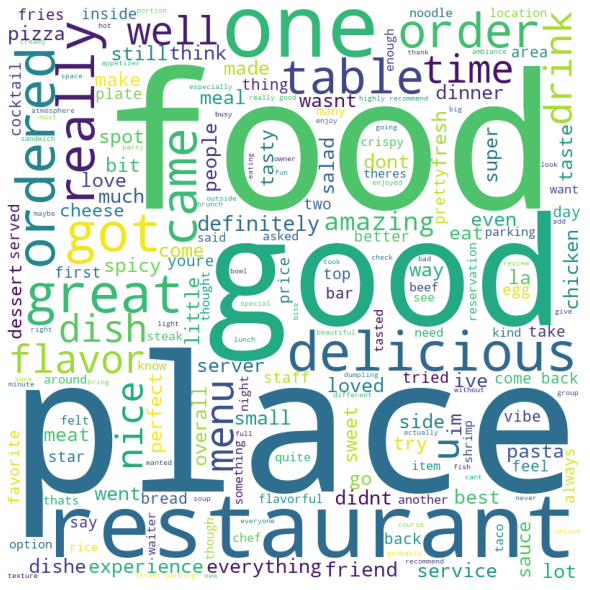

In [85]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Let's remove common words such as "place", "restaurant" and "food" to obtain a more informative word cloud!

We will consider these words as stopwords.

In [130]:
new_stopwords = ["restaurant", "food", "place", "cafe", "drinks", "beverage", 
                 "drink", "eat", "ate", "eaten", "appetizer", "order", "ordered", "meal", "table", "eating"]
stopwords.extend(new_stopwords)

In [120]:
# get words in 5 star reviews and 1 star reviews
review_5 = [preprocessing(df1.loc[(df1["Review"] == 5)]["Customer Reviews"].iloc[i]) for i in range(len(df1[df1["Review"]==5]))]
review_1 = [preprocessing(df1.loc[(df1["Review"] == 1)]["Customer Reviews"].iloc[i]) for i in range(len(df1[df1["Review"]==1]))]

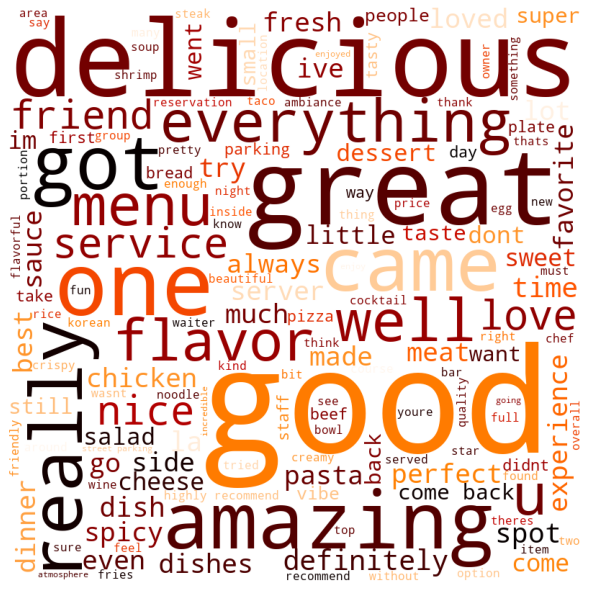

In [127]:
#word cloud for 5 star reviews
five_star_words = ""
for i in review_5:
    for j in i:
        five_star_words += "".join(j)
        five_star_words += " "
    five_star_words += " "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, colormap = "gist_heat", max_words = 150).generate(five_star_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()    

Seems like words with positive connotations such as "good", "delicious" and "amazing" are abundant!

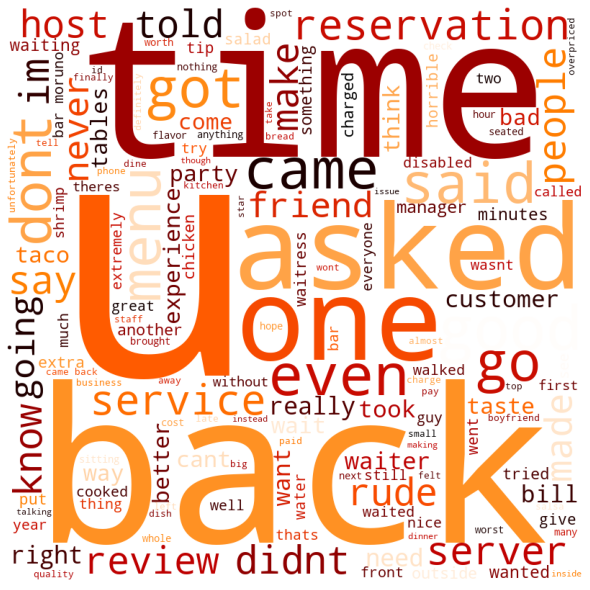

In [129]:
#word cloud for one-star reviewse
one_star_words = ""
for i in review_1:
    for j in i:
        one_star_words += "".join(j)
        one_star_words += " "
    one_star_words += " "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10, max_words = 150, colormap = "gist_heat").generate(one_star_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()   

Negative words such as "rude", "bad" and "overpriced" are present, but aren't the most abundant in the one star reviews. This might be because negative reviews mostly contain anecdotes or accounts of the customer's unpleasant experiences, which might have led to a higher number of verbs.

# USING TF-IDF & SVM

In [223]:
preprocessed_words = ["".join(preprocessing(df1["Sentiment"].loc[i])) for i in range(len(df1))]

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


X_train,X_test,y_train, y_test = train_test_split(df1["Customer Reviews"], preprocessed_words, 
                                                  test_size=0.3, random_state=42) 
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [233]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
clf = LinearSVC(random_state= 42)
clf.fit(tf_x_train,y_train)

LinearSVC(random_state=42)

In [234]:
y_preds=clf.predict(tf_x_test)

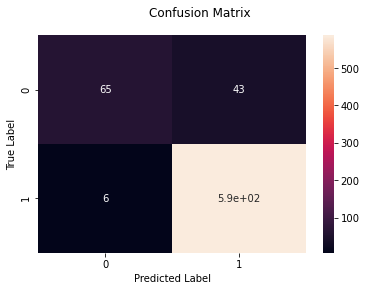

Accuracy: 0.9300998573466477%
Postive Reviews Predicted Accurately: 0.9898819561551433
Negative Reviews Predicted Accurately: 0.6018518518518519


In [235]:
ConfusionMatrix(y_test,y_preds)

The accuracy of the Tf-IDF + Linear SVM method is relatively high, however, it doesn't predict negative reviews that well - only a total of 60% of negative reviews were predicted correctly.

Let's try to do this with a different approach!

# SENTIMENT ANALYSIS USING HUGGINGFACE TRANSFORMERS 

In [420]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import requests
from bs4 import BeautifulSoup
import re

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

loading configuration file https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment/resolve/main/config.json from cache at /Users/peiyuanlee/.cache/huggingface/transformers/d9226eeac7b8b96d83ebc327cdd670490866d8c999505c1f83b6ef206ccb1604.a34960b447312b0727cb670d710444fcb41a6156eddcba062a19b3fc05d95251
Model config BertConfig {
  "_name_or_path": "nlptown/bert-base-multilingual-uncased-sentiment",
  "_num_labels": 5,
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "finetuning_task": "sentiment-analysis",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "1 star",
    "1": "2 stars",
    "2": "3 stars",
    "3": "4 stars",
    "4": "5 stars"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "1 star": 0,
    "2 stars": 1,
    "3 stars": 2,
    "4 stars": 3,
    "5 stars": 4
  },
 

In [16]:
BERT_sentiment = []
for i in range(len(df1)):
    tokens = tokenizer.encode(df1.iloc[i]["Customer Reviews"], padding = True, 
                              truncation = True, return_tensors = "pt")
    results = model(tokens)
    sentiment = int(torch.argmax(results.logits))+1
    BERT_sentiment.append(sentiment)


In [63]:
#classify BERT sentiment labels
#pos if >=4, neg otherwise
BERT_sentiment_label= ["pos" if i >=4 else "neg" for i in BERT_sentiment]

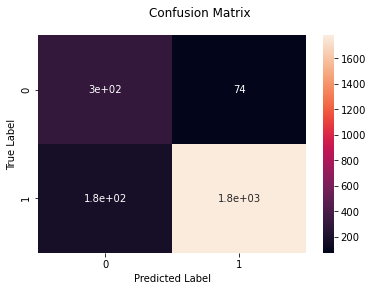

Accuracy: 0.8916488222698072%
Postive Reviews Predicted Accurately: 0.9085334695963209
Negative Reviews Predicted Accurately: 0.8042328042328042


In [228]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import numpy as np

def ConfusionMatrix(inputs, outputs):
    cf = confusion_matrix(inputs, outputs)
    sns.heatmap(cf, annot = True)
    accuracy = np.trace(cf) / float(np.sum(cf))
    pos_review_accuracy = cf[1][1]/ float(np.sum(cf[1:]))
    neg_review_accuracy = cf[0][0]/ float(np.sum(cf[0]))
    plt.ylabel('True Label')
    plt.xlabel("Predicted Label")
    plt.suptitle("Confusion Matrix")
    plt.show()
    print(f"Accuracy: {accuracy}%")
    print(f"Postive Reviews Predicted Accurately: {pos_review_accuracy}")
    print(f"Negative Reviews Predicted Accurately: {neg_review_accuracy}")

ConfusionMatrix(df1["Sentiment"], BERT_sentiment_label)
    

The BERT model predicted 89.16% of labels correctly! A total of 1800 out of 1957 positive reviews were labelled correctly whereas 300 out of 378 negative reviews were predicted correctly. 

Let's try to finetune this!

In [412]:
X = list(df1["Customer Reviews"])
y = [i for i in df1["Review"]]

In [421]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train,X_val,y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [422]:
X_tr1ain_encoding = tokenizer(X_train, truncation = True, padding = True, return_tensors = "pt")
#X_test_encoding = tokenizer(X_test, truncation = True, padding = True, return_tensors = "pt")
X_val_encoding = tokenizer(X_val, truncation = True, padding = True, return_tensors = "pt")

y_train = [i-1 for i in y_train]
y_val = [i-1 for i in y_val]

In [402]:
from torch.utils.data import Dataset
class YELPDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key:torch.tensor(val[idx]) for key,val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

In [424]:
train_dataset = YELPDataset(X_train_encoding, y_train)
val_dataset = YELPDataset(X_val_encoding, y_val)

In [404]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [425]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="test_trainer", 
    num_train_epochs = 2,
    evaluation_strategy="epoch")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 1143
  Num Epochs = 2
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 286
<ipython-input-402-43aef15599c1>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key:torch.tensor(val[idx]) for key,val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.673862,0.686354
2,No log,0.646154,0.755601


***** Running Evaluation *****
  Num examples = 491
  Batch size = 8
<ipython-input-402-43aef15599c1>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key:torch.tensor(val[idx]) for key,val in self.encodings.items()}
***** Running Evaluation *****
  Num examples = 491
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=286, training_loss=0.6092335627629206, metrics={'train_runtime': 8338.5436, 'train_samples_per_second': 0.274, 'train_steps_per_second': 0.034, 'total_flos': 601488073672704.0, 'train_loss': 0.6092335627629206, 'epoch': 2.0})

In [431]:
BERT_finetune_sentiment = []
for i in X_test:
    tokens = tokenizer.encode(i, padding = True, 
                              truncation = True, return_tensors = "pt")
    results = model(tokens)
    sentiment = int(torch.argmax(results.logits))+1
    BERT_finetune_sentiment.append(sentiment)

BERT_finetune_sentiment_label= ["pos" if i >=4 else "neg" for i in BERT_finetune_sentiment]

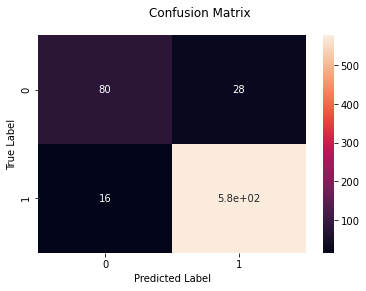

Accuracy: 0.9372325249643366%
Postive Reviews Predicted Accurately: 0.9730185497470489
Negative Reviews Predicted Accurately: 0.7407407407407407


In [430]:
y_test_label = ["pos" if i >=4 else "neg" for i in y_test]
ConfusionMatrix(y_test_label, BERT_finetune_sentiment_label)

The finetuned model predicted 93.72% of labels correctly! 

